Loading File

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling1D, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/SLO/SLO-main/

data = pd.read_csv('data_cancer.csv')

FEATURES = data.drop(["diagnosis", "Unnamed: 32"], axis = 1)
TARGET = data["diagnosis"]
lb = LabelEncoder()
TARGET = lb.fit_transform(TARGET)

es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SLO/SLO-main


PCA

(569, 31)
(569, 31)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_53 (Dense)             (None

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


15/15 [==============================] - 2s 30ms/step - loss: 0.7600 - accuracy: 0.3825 - val_loss: 0.6920 - val_accuracy: 0.6053

Epoch 00001: val_loss improved from inf to 0.69199, saving model to best_weight_scene_mobileNet.h5
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5802 - val_loss: 0.6669 - val_accuracy: 0.6053

Epoch 00002: val_loss improved from 0.69199 to 0.66687, saving model to best_weight_scene_mobileNet.h5
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.6322 - val_loss: 0.6623 - val_accuracy: 0.6316

Epoch 00003: val_loss improved from 0.66687 to 0.66228, saving model to best_weight_scene_mobileNet.h5
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.6193 - val_loss: 0.6603 - val_accuracy: 0.6316

Epoch 00004: val_loss improved from 0.66228 to 0.66032, saving model to best_weight_scene_mobileNet.h5
Epoch 5/1000
15/15 [============

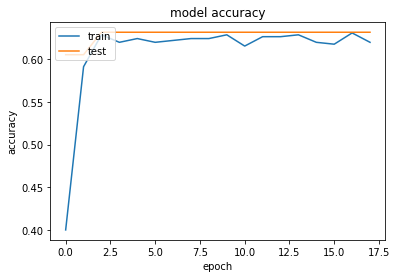

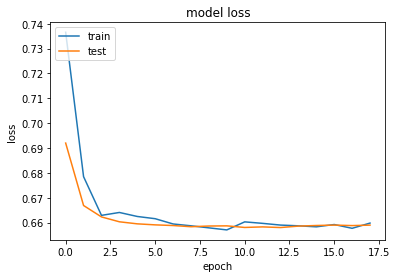

In [14]:
pca = decomposition.PCA(n_components=10)
print(FEATURES.shape)
FEATURESPCA = pca.fit(FEATURES).transform(FEATURES)
print(FEATURES.shape)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESPCA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)
model1 = Sequential(
    [
    Flatten(input_shape=(10,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model1.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

print(H1.history.keys())
# summarize history for accuracy
plt.plot(H1.history['accuracy'])
plt.plot(H1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

LDA

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(31, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_58 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_60 (Dense)             (None, 8)                

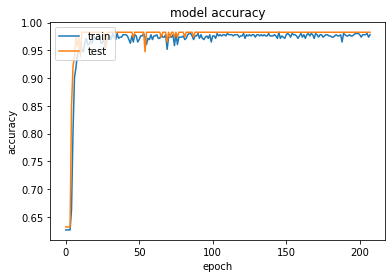

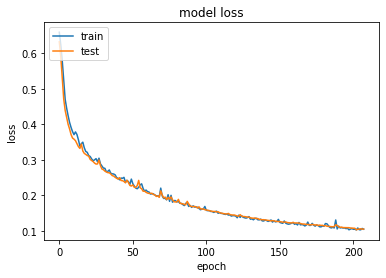

In [15]:
lda = LinearDiscriminantAnalysis(n_components=10)
FEATURESLDA = lda.fit(FEATURES, TARGET).transform(FEATURES)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESLDA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)

model2 = Sequential(
    [
    Flatten(input_shape=(1,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model2.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H2 = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

print(H2.history.keys())
# summarize history for accuracy
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FA

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


15/15 [==============================] - 2s 33ms/step - loss: 0.7839 - accuracy: 0.3837 - val_loss: 0.7237 - val_accuracy: 0.3684

Epoch 00001: val_loss did not improve from 0.10271
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.3750 - val_loss: 0.6909 - val_accuracy: 0.6316

Epoch 00002: val_loss did not improve from 0.10271
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5863 - val_loss: 0.6740 - val_accuracy: 0.6316

Epoch 00003: val_loss did not improve from 0.10271
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6276 - val_loss: 0.6636 - val_accuracy: 0.6316

Epoch 00004: val_loss did not improve from 0.10271
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6205 - val_loss: 0.6565 - val_accuracy: 0.6316

Epoch 00005: val_loss did not improve from 0.10271
Epoch 6/1000
15/15 [======================

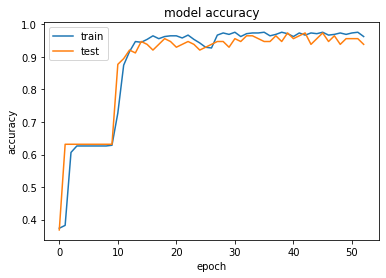

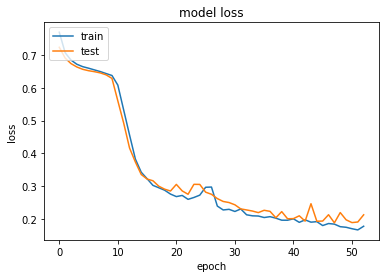

In [16]:
FA = decomposition.FactorAnalysis(n_components=10)
FEATURESFA = FA.fit(FEATURES).transform(FEATURES)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESFA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)

model3 = Sequential(
    [
    Flatten(input_shape=(10,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model3.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model3.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H3 = model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

print(H3.history.keys())
# summarize history for accuracy
plt.plot(H3.history['accuracy'])
plt.plot(H3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H3.history['loss'])
plt.plot(H3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model PCA memiliki nilai akurasi yang paling rendah jika dibandingkan dengan metode reduction yang lainnya dengan nilai akurasi 0.6316. 
Model reduksi yang terbaik pada percobaan ini adalah LDA dengan tingkat akurasi 0.9825, disusul oleh FA dengan tingkat akurasi 0.9386. 